In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('Suicide_Detection.csv', encoding = "utf-8")

In [65]:
df['class'] = df['class'].replace("suicide", 1)
df['class'] = df['class'].replace('non-suicide', 0)

df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,1
1,3,Am I weird I don't get affected by compliments...,0
2,4,Finally 2020 is almost over... So I can never ...,0
3,8,i need helpjust help me im crying so hard,1
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,0
232070,348106,You how you can tell i have so many friends an...,0
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,348108,The usual stuff you find hereI'm not posting t...,1


In [66]:
# Get rid of first column (unnecessary)
df = df.iloc[:,[1,2]]

In [67]:
# Read depression dataset
df_dep = pd.read_csv('depressiontrain.csv', encoding="utf-8", names=["text", "class"])

In [68]:
# get rid of first row
df_dep = df_dep.iloc[1:, :]
df_dep

,text,class
1,damn taking this personality quiz and realizin...,1
2,remember experiencing as kid what now realize ...,1
3,damn louis really did pull me out of my depres...,1
4,my depression is really kicking my ass right n...,1
5,feel like my night is going bad family calling...,1
...,...,...
30996,dnc puppet is claiming she wants to put god am...,0
30997,as soon as my election job is over ll be back ...,0
30998,the moral of the story is you gotta get it fir...,0
30999,got through my hardest week this semester and ...,0


In [69]:
df_dep['class'] = df_dep['class'].replace("1", 1)
df_dep['class'] = df_dep['class'].replace("0", 0)

In [70]:
# Read depresion dataset
df_dep_1 = pd.read_csv('depressiontest.csv', encoding="utf-8", names=["text", "class"])
df_dep_1 = df_dep_1.iloc[1:, :]
df_dep_1

,text,class
1,just know what ur going through battle depress...,1
2,wow depression and anxiety really tryna come f...,1
3,you aint making joke about someones depression...,1
4,why do insta meme pages post videos of naked w...,1
5,cant handle school anymore but hate in person ...,1
...,...,...
30996,the only way they can attract good dicks is to...,0
30997,gotta say like you think we have the same atti...,0
30998,many product companies goes from right to left...,0
30999,just casually playing animal crossing while wa...,0


In [71]:
df_dep_1['class'] = df_dep_1['class'].replace("1", 1)
df_dep_1['class'] = df_dep_1['class'].replace("0", 0)

# Reading more depression dataset

In [72]:
df_dep_2 = pd.read_csv('reddit_depression_suicidewatch.csv', encoding="utf-8", names=["text", 'class'])
df_dep_2 = df_dep_2.iloc[1:,:]
df_dep_2['class'] = 1
df_dep_2

,text,class
1,I recently went through a breakup and she said...,1
2,"I do not know how to navigate these feelings, ...",1
3,"So I have been with my bf for 5 months , and h...",1
4,I am so exhausted of this. Just when I think I...,1
5,I have been severly bullied since i was 5 till...,1
...,...,...
20359,I took 50mg of seroquel a few hours after I dr...,1
20360,that is what has happened to me last week. And...,1
20361,Ever just feel alone in a house full of people...,1
20362,Politicians. Neighbors. Corporations. Society....,1


# Reading short jokes data

In [73]:
# df_joke = pd.read_csv('shortjokes.csv', encoding="utf-8", names=["id", 'text'])
# df_joke = df_joke.iloc[1:,:]
# df_joke['class'] = 0
# df_joke = df_joke.iloc[:,[1,2]]
# df_joke

# Reading movie plots

In [74]:
# df_movie = pd.read_csv('wiki_movie_plots_deduped.csv', encoding="utf-8")
# df_movie = df_movie.iloc[1:,:]
# df_movie = df_movie.iloc[:,[6,7]]
# df_movie['class'] = 0
# df_movie = df_movie.iloc[:,[1,2]]
# df_movie = df_movie.rename(columns={'Plot':"text"})



# Reading twitter data

In [75]:
df_tweet = pd.read_csv('Twitter_Data.csv', encoding="utf-8", names=["text", 'class'])
df_tweet = df_tweet.iloc[1:,:]
df_tweet = df_tweet.dropna()
df_tweet['class'] = df_tweet['class'].replace('1', 0)
df_tweet['class'] = df_tweet['class'].replace('0', 0)
df_tweet['class'] = df_tweet['class'].replace('-1', 1)
df_tweet['class'].value_counts()

0    127460
1     35509
Name: class, dtype: int64

In [76]:
df = pd.concat([df, df_dep, df_dep_1, df_dep_2, df_tweet])

In [77]:
df['class'].value_counts()

0    273497
1    203909
Name: class, dtype: int64

In [78]:
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
162976,why these 456 crores paid neerav modi not reco...,1
162977,dear rss terrorist payal gawar what about modi...,1
162978,did you cover her interaction forum where she ...,0
162979,there big project came into india modi dream p...,0


In [79]:
import re
from string import punctuation
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
import unidecode


In [80]:
def depure_data(data):

    #Removing emojis, symbols, maps, flags etc
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        
                           "]+", flags=re.UNICODE)

        
    data = data.map(lambda x: emoji_pattern.sub(r'', x))

        
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = data.map(lambda x: url_pattern.sub(r'', x))

    # Remove Emails
    data = data.map(lambda x: re.sub('\S*@\S*\s?', '', x)) 

    # Remove new line characters
    data = data.map(lambda x: re.sub('\s+', ' ', x)) 

    # convert back to unicode
    data = data.map(lambda x: unidecode.unidecode(x))

    # Remove punctuation
    data = data.map(lambda x: ''.join([c for c in x if c not in punctuation]))

    # Remove distracting single quotes
    data = data.map(lambda x: re.sub("\'", "", x)) 

        
    return data

In [81]:
df.iloc[4,:][0]

'I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for so long and I’m too scared to come out to my family about these feelings. About 3 years ago  losing my aunt triggered it all. Everyday feeling hopeless , lost, guilty, and remorseful over her and all the things I’ve done in my life,but thoughts like these with the little I’ve experienced in life? Only time I’ve revealed these feelings to my family is when I broke down where they saw my cuts. Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful. They later found out I was an attempt survivor from attempt OD(overdose from pills) and attempt hanging. All that happened was a blackout from the pills and I never went through with the noose because I’m still so afraid. During my first therapy I was diagnosed with severe depression, social anxiet

In [82]:
df['text'] = depure_data(df['text'])

In [83]:
df.iloc[4,:][0]

'Im so lostHello my name is Adam 16 and Ive been struggling for years and Im afraid Through these past years thoughts of suicide fear anxiety Im so close to my limit  Ive been quiet for so long and Im too scared to come out to my family about these feelings About 3 years ago losing my aunt triggered it all Everyday feeling hopeless  lost guilty and remorseful over her and all the things Ive done in my lifebut thoughts like these with the little Ive experienced in life Only time Ive revealed these feelings to my family is when I broke down where they saw my cuts Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful They later found out I was an attempt survivor from attempt ODoverdose from pills and attempt hanging All that happened was a blackout from the pills and I never went through with the noose because Im still so afraid During my first therapy I was diagnosed with severe depression social anxiety and a eating disorder I was la

In [84]:
df['text']

0         Ex Wife Threatening SuicideRecently I left my ...
1         Am I weird I dont get affected by compliments ...
2         Finally 2020 is almost over So I can never hea...
3                 i need helpjust help me im crying so hard
4         Im so lostHello my name is Adam 16 and Ive bee...
                                ...                        
162976    why these 456 crores paid neerav modi not reco...
162977    dear rss terrorist payal gawar what about modi...
162978    did you cover her interaction forum where she ...
162979    there big project came into india modi dream p...
162980    have you ever listen about like gurukul where ...
Name: text, Length: 477406, dtype: object

In [85]:
text_in_list = df['text'].values.tolist()


In [86]:
import wordninja


In [87]:
df['text_split'] = df['text'].map(lambda x: wordninja.split(x))

In [88]:
df['text_split']

0         [Ex, Wife, Threatening, Suicide, Recently, I, ...
1         [Am, I, weird, I, dont, get, affected, by, com...
2         [Finally, 2020, is, almost, over, So, I, can, ...
3         [i, need, help, just, help, me, im, crying, so...
4         [Im, so, lost, Hello, my, name, is, Adam, 16, ...
                                ...                        
162976    [why, these, 456, crores, paid, nee, rav, modi...
162977    [dear, rss, terrorist, pay, al, gawar, what, a...
162978    [did, you, cover, her, interaction, forum, whe...
162979    [there, big, project, came, into, india, modi,...
162980    [have, you, ever, listen, about, like, guru, k...
Name: text_split, Length: 477406, dtype: object

In [89]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [91]:
df['clean_text'] = df['text_split'].map(lambda x: detokenize(x))

In [92]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

In [94]:
import itertools
merged = list(itertools.chain(*df['text_split'].values.tolist()))
len(set(merged))


112543

In [95]:
max_words = len(set(merged)) + 1
max_len = 500

In [96]:
max_words

112544

In [100]:
df['class'].value_counts()

0    273497
1    203909
Name: class, dtype: int64

# Upsample imbalanced data

In [97]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [98]:
# Separate majority and minority classes
data_majority = df[df['class'] == 0]
data_minority = df[df['class'] == 1]

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [99]:
# Separate majority and minority classes in training data for upsampling 
data_majority = train[train['class'] == 0]
data_minority = train[train['class'] == 1]

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",data_upsampled['class'].value_counts(),sep = "")


tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(df['clean_text'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['clean_text'].values)
X_train = pad_sequences(X_train,maxlen=max_len)
Y_train = pd.get_dummies(data_upsampled['class']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['clean_text'].values)
X_test = pad_sequences(X_test,maxlen=max_len)
Y_test = pd.get_dummies(test['class']).values
print("x_test shape", X_test.shape)

majority class before upsample: (218798, 4)
minority class before upsample: (163127, 4)
After upsampling
0    218798
1    218798
Name: class, dtype: int64
x_train shape: (437596, 500)
x_test shape (50008, 500)


# LSTM Model

In [101]:
import numpy as np

In [142]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers import SpatialDropout1D
import keras
from keras.models import load_model

In [538]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40)) #The embedding layer
model1.add(SpatialDropout1D(0.4))
model1.add(layers.LSTM(15,dropout=0.5, recurrent_dropout=0.5)) #Our LSTM layer
model1.add(layers.Dense(2,activation='sigmoid'))

In [539]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [540]:
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [542]:
history = model1.fit(X_train, Y_train, epochs=1,validation_data=(X_test, Y_test),callbacks=[checkpoint1])

27002/27002 [==============================] - 4030s 149ms/step - loss: 0.2462 - accuracy: 0.8984 - val_loss: 0.1924 - val_accuracy: 0.9276

Epoch 00001: val_accuracy improved from -inf to 0.92755, saving model to best_model1.hdf5


In [570]:
sentiment = ["Not Depressed", "Depressed"]
sequence = tokenizer.texts_to_sequences(["I am feeling low since 2 days. is it depression"])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model1.predict(test), decimals=0).argmax(axis=1)[0]]

'Depressed'

In [571]:
model1.predict(test)

array([[0.00629434, 0.99332595]], dtype=float32)

In [94]:
model1.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


# Confusion Matrix

C:\Users\SAIRAM~1\AppData\Local\Temp/ipykernel_10144/3883251052.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<AxesSubplot:>

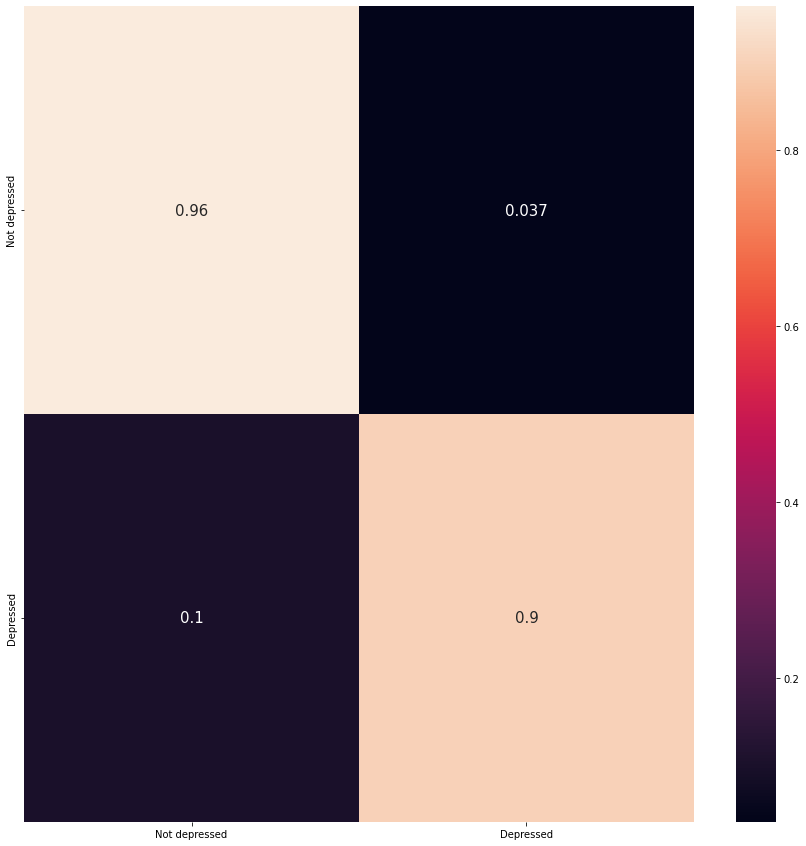

In [547]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
matrix = confusion_matrix(np.around(Y_test, decimals=0).argmax(axis=1), np.around(model1.predict(X_test), decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['Not depressed','Depressed'],columns = ['Not depressed','Depressed'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

95% of not depressed was predicted as not depressed. 92% of depressed was predicted as depressed

# Bi-directional LSTM

In [103]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 64, input_length=max_len))
model2.add(SpatialDropout1D(0.4))
model2.add(layers.Bidirectional(layers.LSTM(192,dropout=0.5, recurrent_dropout=0.5)))

model2.add(layers.Dense(2,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])



In [106]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

In [107]:
model = load_model('model-bi-192')

In [109]:
checkpoint2 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)


In [110]:

history = model.fit(X_train, Y_train, epochs=5, batch_size= 500, validation_data=(X_test, Y_test),callbacks=[checkpoint2, earlyStopping])

Epoch 1/5
876/876 [==============================] - 12318s 14s/step - loss: 0.1208 - accuracy: 0.9564 - val_loss: 0.1676 - val_accuracy: 0.9404

Epoch 00001: val_accuracy improved from -inf to 0.94045, saving model to best_model3.hdf5
Epoch 2/5
876/876 [==============================] - 13621s 16s/step - loss: 0.1064 - accuracy: 0.9617 - val_loss: 0.1738 - val_accuracy: 0.9406

Epoch 00002: val_accuracy improved from 0.94045 to 0.94057, saving model to best_model3.hdf5
Epoch 3/5
876/876 [==============================] - 14154s 16s/step - loss: 0.0974 - accuracy: 0.9650 - val_loss: 0.1664 - val_accuracy: 0.9426

Epoch 00003: val_accuracy improved from 0.94057 to 0.94261, saving model to best_model3.hdf5
Epoch 4/5
876/876 [==============================] - 14355s 16s/step - loss: 0.0888 - accuracy: 0.9683 - val_loss: 0.1754 - val_accuracy: 0.9429

Epoch 00004: val_accuracy improved from 0.94261 to 0.94293, saving model to best_model3.hdf5
Epoch 5/5
876/876 [============================

# Confusion matrix


C:\Users\SAIRAM~1\AppData\Local\Temp/ipykernel_85928/2431787229.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


<AxesSubplot:>

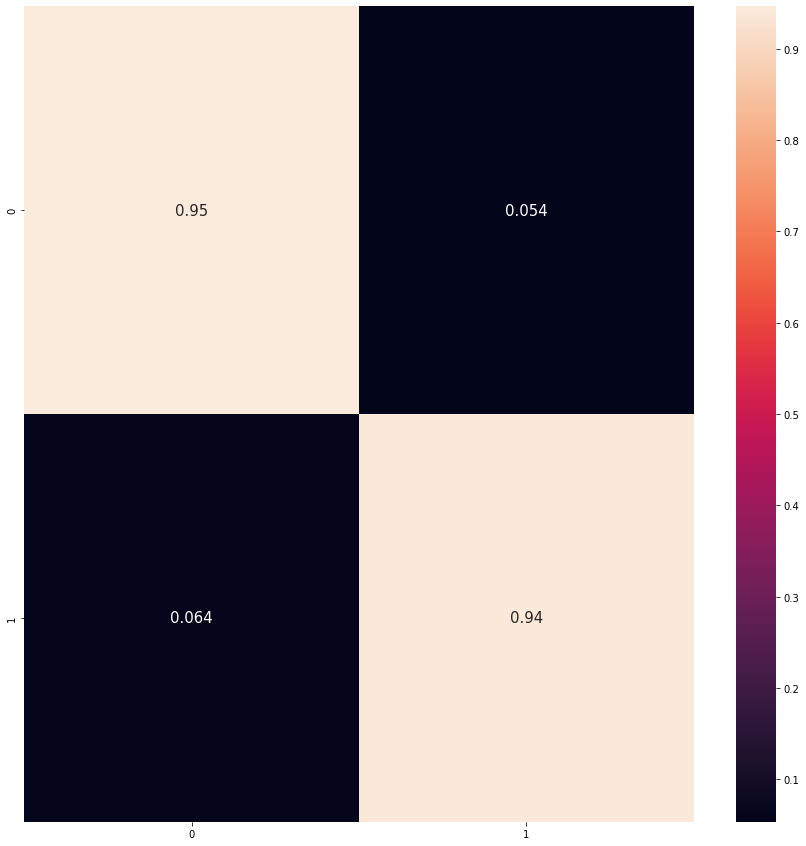

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
matrix = confusion_matrix(np.around(Y_test, decimals=0).argmax(axis=1), np.around(model.predict(X_test), decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['0','1'],columns = ['0','1'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [227]:

TP = conf_matrix['1']['1']

TN = conf_matrix['0']['0']

FN = conf_matrix['0']['1']

FP = conf_matrix['1']['0']

recall = TP / (TP + FP)
precision = TP / (TP + FN)

f1_score = 2 / ((1/recall) + (1/precision))

accuracy = (TP + TN)/(TP + TN + FP + FN)

f1_score



0.9408733576208175

In [ ]:
# model2.save('model-bi')

In [113]:
model.save('model-bi-new.h5')

In [114]:
m = load_model('model-bi-new.h5')

In [325]:
sentiment[np.around(m.predict(test), decimals=0).argmax(axis=1)[0]]

'Depressed'

In [334]:
sentiment = ["Not Depressed", "Depressed"]
user_input = "I want to die"

sequence = tokenizer.texts_to_sequences([user_input])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]

'Depressed'

In [335]:
(m.predict(test))

array([[0.03054568, 0.96835876]], dtype=float32)

# Save tokenizer

In [339]:
import json, io

In [340]:
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))